In [1]:
import pandas as pd
import sklearn as scikit
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Initialize data to be from the excel sheet
file_name = "default of credit card clients.xls"
raw_data = pd.read_excel(file_name)

In [3]:
print(raw_data)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

NOTE: Our original data has the labels underneath arbitrary x1,x2,...xn labels. We will omit fix the formate of the dataframe first to have the proper labels in the dataframe.

In [4]:
# Format of data frame is configured incorrectly. We will fix format here...
# Fixing the dataframes labels...
raw_data.columns = raw_data.iloc[0]
# Removing labels from being within the dataframe...
raw_data = raw_data.iloc[1:,:]
#Removing first column ID from within the dataframe as not relevent to our models
raw_data = raw_data.iloc[:,1:]


raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now with our data initialized, lets take a moment to explore the distribution of our classes

In [5]:
# Define a function to plot the distribution of a column
def plot_distribution(df, column):
    # Get the number of unique values in the column
    num_unique_values = df[column].nunique()
    df[column].hist(bins=num_unique_values, figsize=(10,5))
    plt.xlabel(column)
    plt.ylabel('Number of people')
    plt.title(f'Distribution of {column}')
    plt.show()

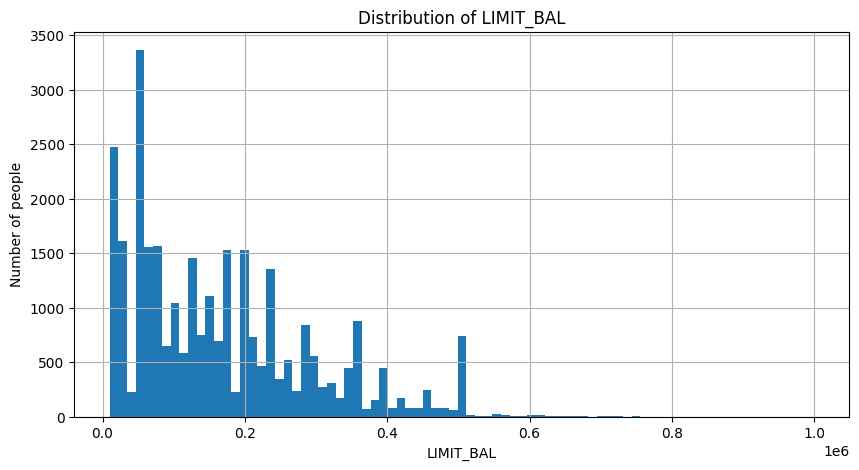

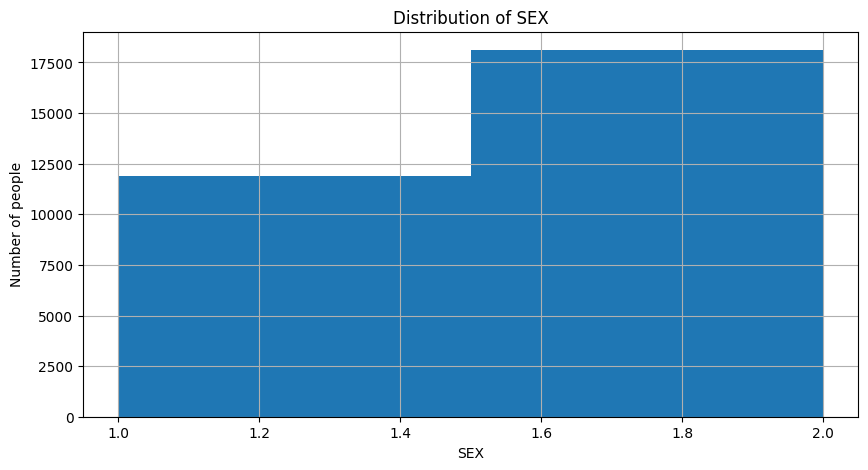

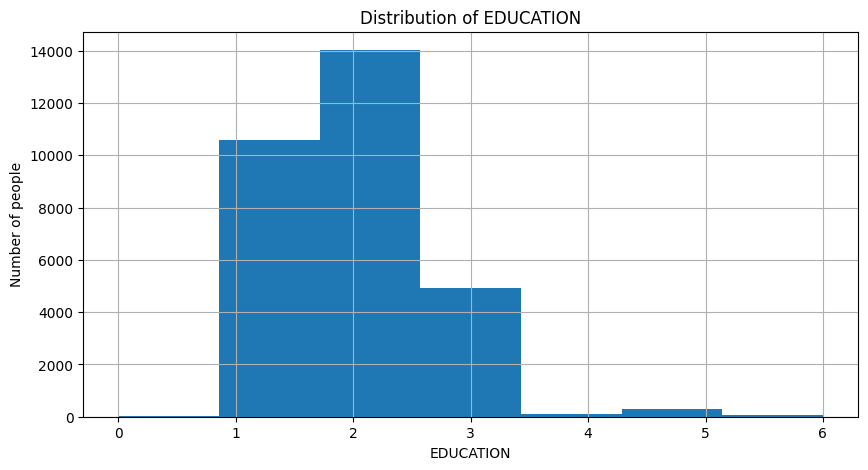

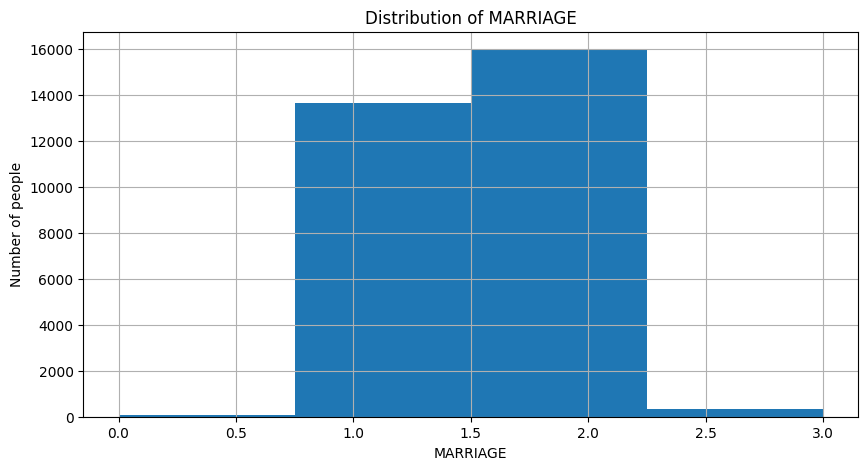

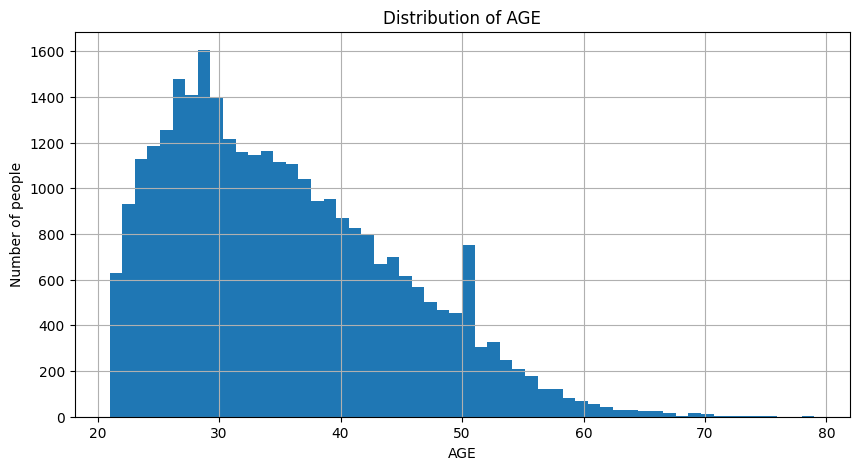

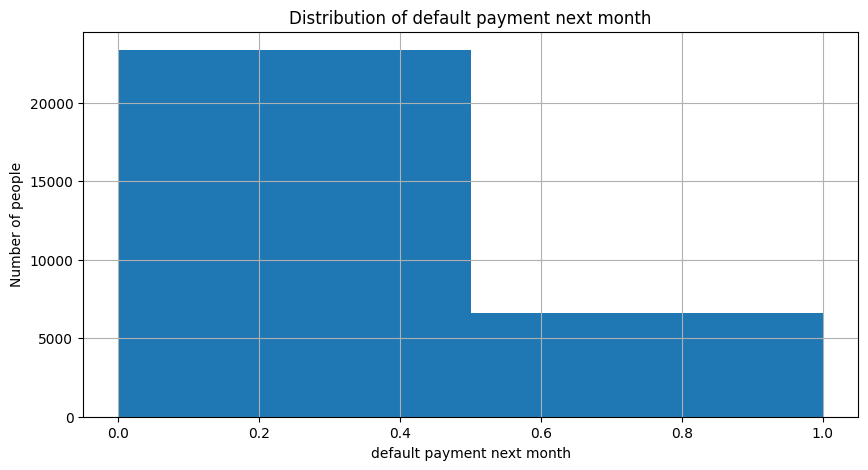

In [6]:
plot_distribution(raw_data, 'LIMIT_BAL') # limit_balance
plot_distribution(raw_data, 'SEX') # sex
plot_distribution(raw_data, 'EDUCATION') # Education
plot_distribution(raw_data, 'MARRIAGE') # Marriage
plot_distribution(raw_data, 'AGE') # Age
plot_distribution(raw_data, 'default payment next month') #default

There happens to be a few items that are not defined int he dataset and therefore will be removed.

In [7]:
data = raw_data[raw_data['MARRIAGE'] != 0]
data = data[data['EDUCATION'] < 4]
data = data[data['EDUCATION'] != 0]

# Reverse the order of the time series columns so that the months are in order...
data.iloc[:, 5:11] = data.iloc[:, 10:4:-1].values
data.iloc[:, 11:17] = data.iloc[:, 16:10:-1].values
data.iloc[:, 17:23] = data.iloc[:, 22:16:-1].values

In [8]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,-2,-2,-1,-1,2,...,689,3102,3913,0,0,0,0,689,0,1
2,120000,2,2,2,26,2,0,0,0,2,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
4,50000,2,2,1,37,0,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
5,50000,1,2,1,57,0,0,0,-1,0,...,35835,5670,8617,679,689,9000,10000,36681,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,192815,188948,1000,5000,3047,5003,20000,8500,0
29997,150000,1,3,2,43,0,0,-1,-1,-1,...,3502,1828,1683,0,0,129,8998,3526,1837,0
29998,30000,1,2,2,37,0,0,-1,2,3,...,2758,3356,3565,3100,2000,4200,22000,0,0,1
29999,80000,1,3,1,41,-1,0,0,0,-1,...,76304,78379,-1645,1804,52964,1926,1178,3409,85900,1


NOTE: After removal, we see that we lost 522 points, a 0.01% loss of our data. This loss of information may help with fitting of our models since the data is more "correct" now. Distribution is not affected and therefore, the process remains valid

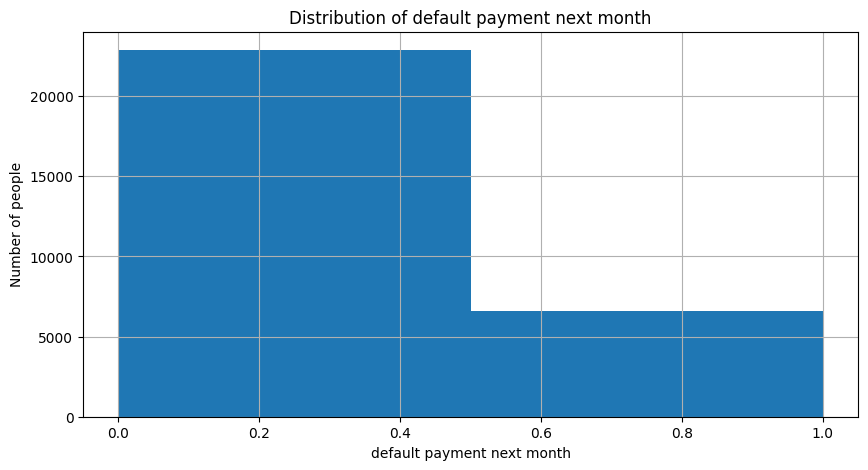

In [9]:
plot_distribution(data, 'default payment next month')

In [10]:
counts = data['default payment next month'].value_counts(normalize=True) * 100
print("Percentage of 0s: ", counts[0])
print("Percentage of 1s: ", counts[1])

Percentage of 0s:  77.61720605197097
Percentage of 1s:  22.38279394802904


We can see that our data is imbalanced and has a skewed nature to it. We should try different methods to get a better representation to work on. However, for now let us work with the entire data frame to gain a reference.

Let us do simple preprocessing to get our split datasets ready.

In [11]:
from sklearn.model_selection import train_test_split

# Assuming raw_data is your DataFrame and `defalut payment next month` is the target variable
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Convert the frame to float32 to work with neural networks
X = X.astype('float32')
y = y.astype('float32')

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set into demographic and time series data
X_demographic_train = X_train[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_train = X_train.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(-1,3,6)



# Do the same for the validation set
X_demographic_val = X_val[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_val = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(-1,3,6)

# And the test set
X_demographic_test = X_test[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_test = X_test.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(-1, 3, 6)

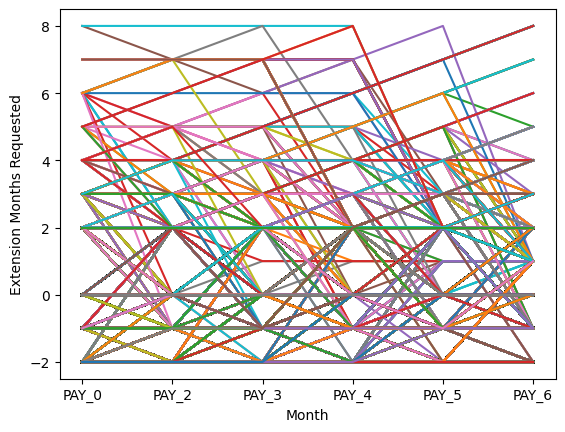

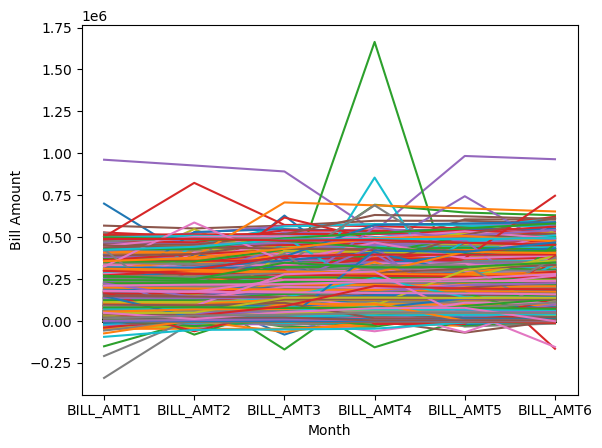

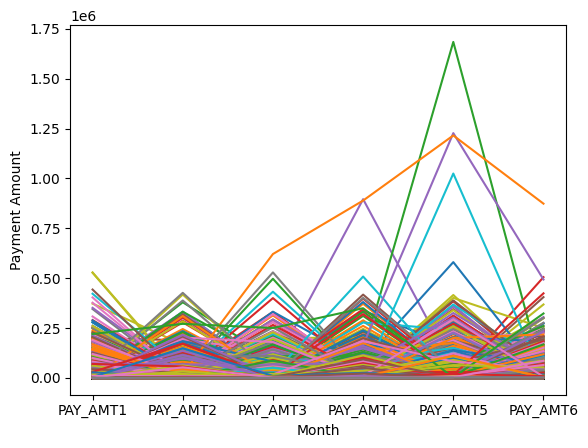

In [12]:
# Select columns 6-11 (Python uses 0-based indexing)
selected_columns = X.iloc[:, 5:11]

# Create a new figure
plt.figure()

# For each row (user) in the DataFrame, plot their data
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)

# Set the x and y axis labels
plt.xlabel('Month')
plt.ylabel('Extension Months Requested')

# Show the plot
plt.show()

# Select columns 12-17 and plot
selected_columns = X.iloc[:, 11:17]
plt.figure()
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)
plt.xlabel('Month')
plt.ylabel('Bill Amount')
plt.show()

# Select columns 18-23 and plot
selected_columns = X.iloc[:, 17:23]
plt.figure()
for index, row in selected_columns.iterrows():
    plt.plot(row.index, row.values)
plt.xlabel('Month')
plt.ylabel('Payment Amount')
plt.show()



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(0)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rn.seed(0)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(0)

In [14]:
# Define the model: This will be LSTM using all data...
lstmALL = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
lstmALL.add(LSTM(units=18, dropout=0.2, input_shape=(3,6)))

# Add Dense layer for demographic data
lstmALL.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
lstmALL.add(Dense(1, activation='sigmoid'))

# Compile the model
lstmALL.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
lstmALL.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6383 - loss: 0.6284 - val_accuracy: 0.7693 - val_loss: 0.5348
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7825 - loss: 0.5217 - val_accuracy: 0.7736 - val_loss: 0.5253
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.7851 - loss: 0.5126 - val_accuracy: 0.7739 - val_loss: 0.5227
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7868 - loss: 0.5078 - val_accuracy: 0.7741 - val_loss: 0.5156
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.7883 - loss: 0.4956 - val_accuracy: 0.7759 - val_loss: 0.5025
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.7860 - loss: 0.4895 - val_accuracy: 0.7753 - val_loss: 0.4936
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7896 - loss: 0.4809 - val_accuracy: 0.7890 - val_loss: 0.4789
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.7993 - loss: 0.4678 - val_accuracy:

In [15]:
# Define the model: This will be RNN using all data...
rnnALL = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
rnnALL.add(SimpleRNN(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for demographic data
rnnALL.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
rnnALL.add(Dense(1, activation='sigmoid'))

# Compile the model
rnnALL.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
rnnALL.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6678 - loss: 0.6687 - val_accuracy: 0.7700 - val_loss: 0.5443
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7838 - loss: 0.5316 - val_accuracy: 0.7743 - val_loss: 0.5354
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.7838 - loss: 0.5237 - val_accuracy: 0.7746 - val_loss: 0.5334
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7848 - loss: 0.5231 - val_accuracy: 0.7746 - val_loss: 0.5340
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7855 - loss: 0.5213 - val_accuracy: 0.7746 - val_loss: 0.5337
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7843 - loss: 0.5218 - val_accuracy: 0.7748 - val_loss: 0.5330
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7842 - loss: 0.5211 - val_accuracy: 0.7748 - val_loss: 0.5328
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.7841 - loss: 0.5187 - val_accuracy:

In [16]:
# Define the model: This will be LSTM using time-series only...
lstmTIME = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
lstmTIME.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
lstmTIME.add(Dense(1, activation='sigmoid'))

# Compile the model
lstmTIME.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
lstmTIME.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5194 - loss: 0.7473 - val_accuracy: 0.7632 - val_loss: 0.5388
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.7731 - loss: 0.5116 - val_accuracy: 0.7746 - val_loss: 0.4873
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.7880 - loss: 0.4670 - val_accuracy: 0.7907 - val_loss: 0.4723
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.8077 - loss: 0.4559 - val_accuracy: 0.7965 - val_loss: 0.4696
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8103 - loss: 0.4539 - val_accuracy: 0.7970 - val_loss: 0.4688
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.8090 - loss: 0.4578 - val_accuracy: 0.8019 - val_loss: 0.4672
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.8153 - loss: 0.4519 - val_accuracy: 0.8017 - val_loss: 0.4679
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - accuracy: 0.8157 - loss: 0.4494 - val_accuracy: 0

In [17]:
# Define the model: This will be RNN using time-series only...
rnnTIME = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
rnnTIME.add(SimpleRNN(units=18, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
rnnTIME.add(Dense(1, activation='sigmoid'))

# Compile the model
rnnTIME.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
rnnTIME.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7650 - loss: 0.5579 - val_accuracy: 0.7731 - val_loss: 0.5510
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7844 - loss: 0.5335 - val_accuracy: 0.7734 - val_loss: 0.5439
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7850 - loss: 0.5296 - val_accuracy: 0.7739 - val_loss: 0.5416
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7855 - loss: 0.5236 - val_accuracy: 0.7743 - val_loss: 0.5380
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7863 - loss: 0.5228 - val_accuracy: 0.7743 - val_loss: 0.5355
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7856 - loss: 0.5213 - val_accuracy: 0.7744 - val_loss: 0.5358
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.7862 - loss: 0.5205 - val_accuracy: 0.7743 - val_loss: 0.5349
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7855 - loss: 0.5202 - va

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score #will be used to printInfo of models

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def printInfo(model, inputs):
    # Use the model to make predictions
    y_pred_prob = model.predict(inputs)

    # Apply a threshold to get strict 0 or 1 values
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Now compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])) for i in range(cm.shape[0])])

    # Print the metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")

    # Draw the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8169945725915875
Precision: 0.6517857142857143
Recall: 0.3880030372057707
Specificity: 0.7470587413369103


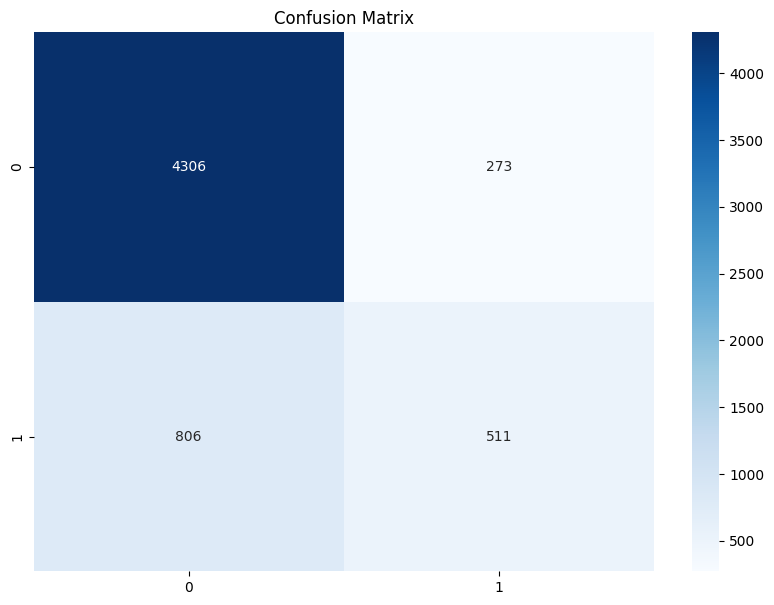

In [20]:
printInfo(lstmALL, [X_time_series_test, X_demographic_test])

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7766282225237449
Precision: 0.0
Recall: 0.0
Specificity: nan


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\godha\AppData\Local\Temp\ipykernel_21924\1464171060.py:18: RuntimeWarning: invalid value encountered in scalar divide
  specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])) for i in range(cm.shape[0])])


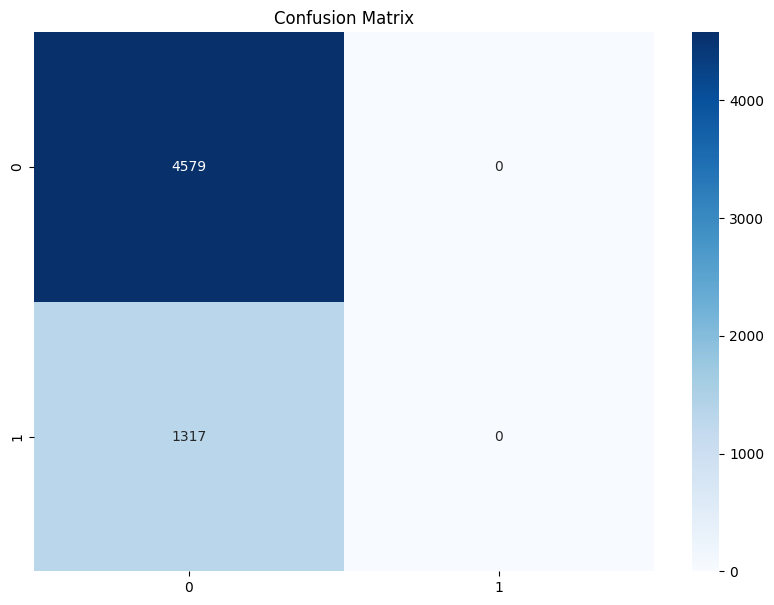

In [21]:
printInfo(rnnALL, [X_time_series_test, X_demographic_test])

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8168249660786974
Precision: 0.6348122866894198
Recall: 0.42369020501138954
Specificity: 0.741763328913775


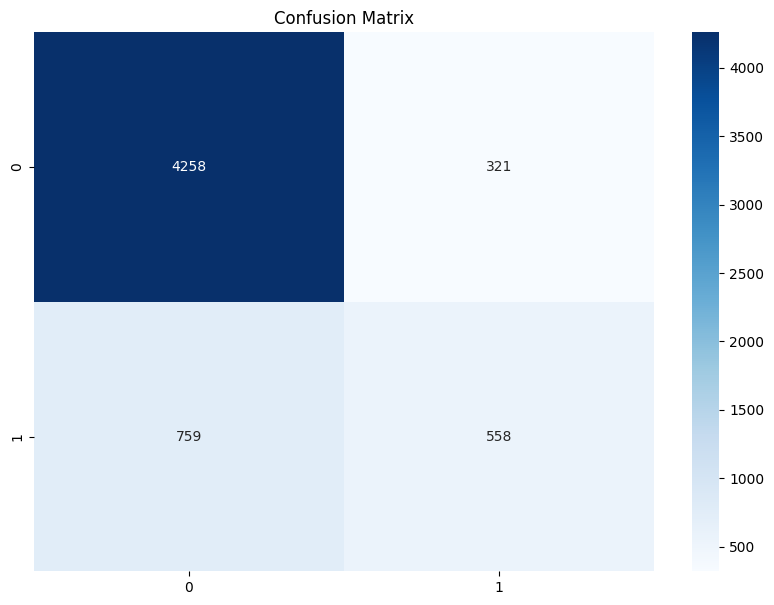

In [22]:
printInfo(lstmTIME, X_time_series_test)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
Accuracy: 0.7790027137042063
Precision: 0.7333333333333333
Recall: 0.016704631738800303
Specificity: 0.7562848050914877


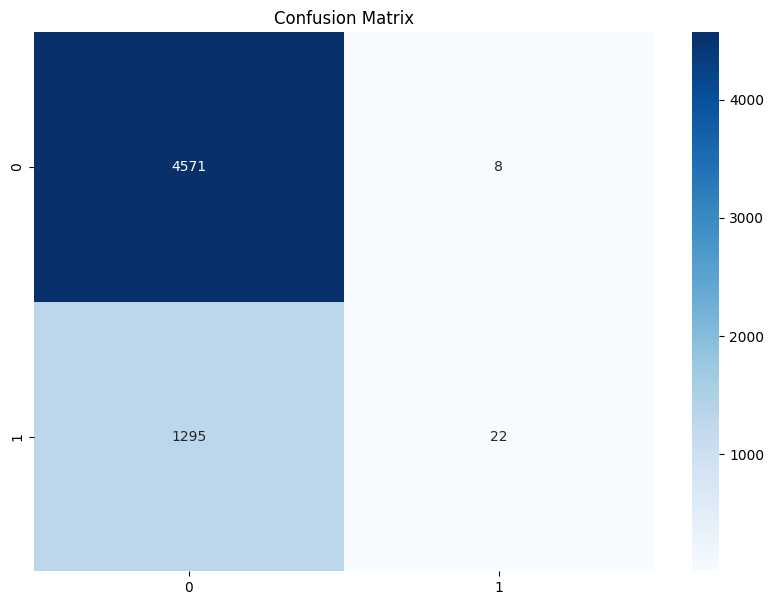

In [23]:
printInfo(rnnTIME, X_time_series_test)

# Let us try to get a good model based on relevent data only (i.e only time series)

Let us try to make the model more "focused" Lets have layers that look at the one-to-one relation prior to applying a relation overall datapoints.

In [24]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras_self_attention import SeqWeightedAttention

# Define the model
attentionLSTM = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM.add(LSTM(units=18, dropout=0.2, return_sequences=True, input_shape=(3, 6)))

# Add attention layer
attentionLSTM.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6533 - loss: 0.6256 - val_accuracy: 0.7732 - val_loss: 0.4944
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7951 - loss: 0.4703 - val_accuracy: 0.7922 - val_loss: 0.4700
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8088 - loss: 0.4533 - val_accuracy: 0.7997 - val_loss: 0.4656
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8114 - loss: 0.4516 - val_accuracy: 0.8017 - val_loss: 0.4624
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8130 - loss: 0.4481 - val_accuracy: 0.8005 - val_loss: 0.4621
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8144 - loss: 0.4470 - val_accuracy: 0.8009 - val_loss: 0.4618
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8188 - loss: 0.4474 - val_accuracy: 0.8014 - val_loss: 0.4608
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8187 - loss: 0.4464 - val_accuracy: 0.8016 - val_

In [25]:
from keras.layers import Bidirectional

# Define the model: This will be LSTM using time-series only...
biLSTM = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
biLSTM.add(Bidirectional(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences= True)))

# Add attention layer
biLSTM.add(SeqWeightedAttention())

# Add Dropout layer
biLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
biLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
biLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
biLSTM.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7214 - loss: 0.5799 - val_accuracy: 0.7705 - val_loss: 0.4893
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7952 - loss: 0.4677 - val_accuracy: 0.7970 - val_loss: 0.4667
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8103 - loss: 0.4486 - val_accuracy: 0.7992 - val_loss: 0.4626
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8150 - loss: 0.4480 - val_accuracy: 0.8002 - val_loss: 0.4601
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8156 - loss: 0.4446 - val_accuracy: 0.8009 - val_loss: 0.4583
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - loss: 0.4421 - val_accuracy: 0.8019 - val_loss: 0.4576
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8178 - loss: 0.4412 - val_accuracy: 0.8024 - val_loss: 0.4578
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8181 - loss: 0.4403 - val_accuracy: 0.

In [26]:
# Define the model: This will be LSTM using time-series only...
gradientLSTM = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6), return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6), return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=4, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
gradientLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
gradientLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
gradientLSTM.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7789 - loss: 0.5554 - val_accuracy: 0.7988 - val_loss: 0.4726
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8093 - loss: 0.4576 - val_accuracy: 0.8009 - val_loss: 0.4702
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8110 - loss: 0.4550 - val_accuracy: 0.8022 - val_loss: 0.4677
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8106 - loss: 0.4519 - val_accuracy: 0.8026 - val_loss: 0.4615
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8081 - loss: 0.4512 - val_accuracy: 0.8022 - val_loss: 0.4605
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4500 - val_accuracy: 0.8029 - val_loss: 0.4606
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8119 - loss: 0.4507 - val_accuracy: 0.8019 - val_loss: 0.4601
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8116 - loss: 0.4491 - val_accuracy: 0.

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8217435549525102
Precision: 0.6878531073446328
Recall: 0.3697798025816249
Specificity: 0.7639342637725477


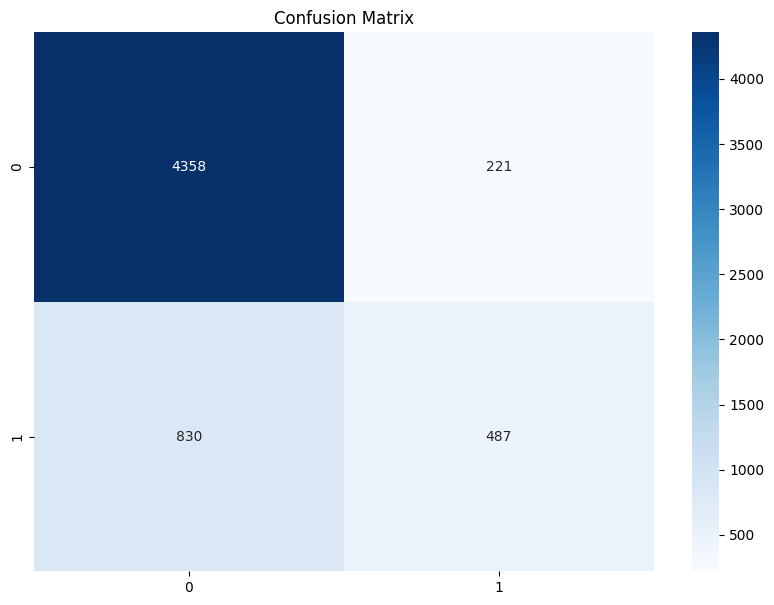

In [27]:
printInfo(attentionLSTM, X_time_series_test)

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.823270013568521
Precision: 0.676962676962677
Recall: 0.39939255884586183
Specificity: 0.7612201546563726


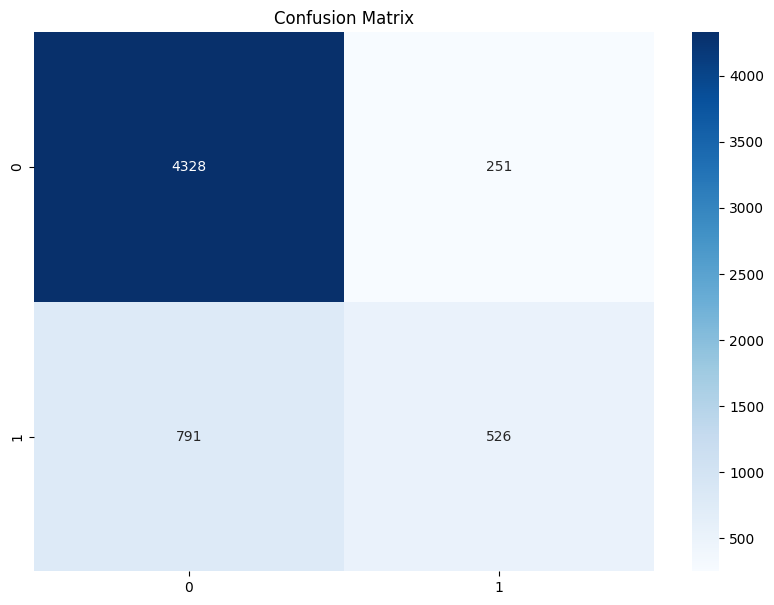

In [28]:
printInfo(biLSTM, X_time_series_test)

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.82140434192673
Precision: 0.6466666666666666
Recall: 0.4419134396355353
Specificity: 0.7497744862556712


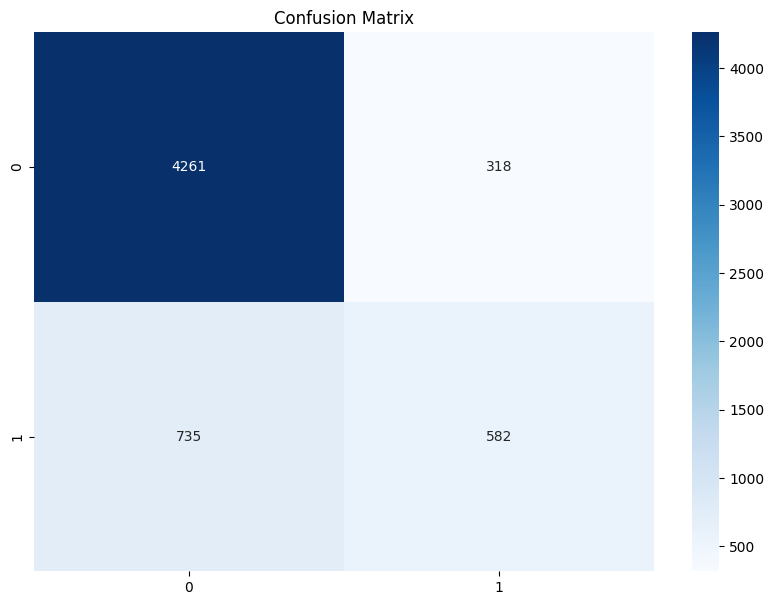

In [29]:
printInfo(gradientLSTM, X_time_series_test)

# Lets try some further preprocessing to potentially improve our results...

In [30]:
from sklearn.preprocessing import StandardScaler


# standardize the features
scaler = StandardScaler()
#keep the same splits we had and just apply the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, index=X_val.index, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


Note: we have X_resampled and y_resampled and we need to split these into train/test sets again....

This time around however, we will only extract the time series data

In [31]:
# Split away the time series data again...
X_time_series_train_scaled = X_train_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train_scaled = X_time_series_train_scaled.values.reshape(-1,3,6)

# Do the same for the validation set
X_time_series_val_scaled = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val_scaled = X_time_series_val_scaled.values.reshape(-1,3,6)

# And the test set
X_time_series_test_scaled = X_test_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test_scaled = X_time_series_test_scaled.values.reshape(-1,3,6)


In [32]:
#REPEAT OUR STRUCUTRE OF BEST MODEL SO FAR ON THIS NEW DATASET
from keras_self_attention import SeqWeightedAttention
# Define the model
attentionLSTM_s = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM_s.add(LSTM(units=18, dropout=0.2, return_sequences=True, input_shape=(3,6)))

# Add attention layer
attentionLSTM_s.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM_s.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM_s.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM_s.fit(X_time_series_train_scaled, y_train, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7677 - loss: 0.5790 - val_accuracy: 0.7646 - val_loss: 0.5967
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8101 - loss: 0.4545 - val_accuracy: 0.7575 - val_loss: 0.5646
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8166 - loss: 0.4460 - val_accuracy: 0.7605 - val_loss: 0.5623
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8132 - loss: 0.4490 - val_accuracy: 0.7514 - val_loss: 0.5646
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8190 - loss: 0.4411 - val_accuracy: 0.7417 - val_loss: 0.5789
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8190 - loss: 0.4392 - val_accuracy: 0.7532 - val_loss: 0.5692
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8212 - loss: 0.4410 - val_accuracy: 0.7490 - val_loss: 0.5735
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8209 - loss: 0.4400 - val_accuracy: 0.7573 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8224219810040706
Precision: 0.6934097421203438
Recall: 0.3675018982536067
Specificity: 0.766577899147898


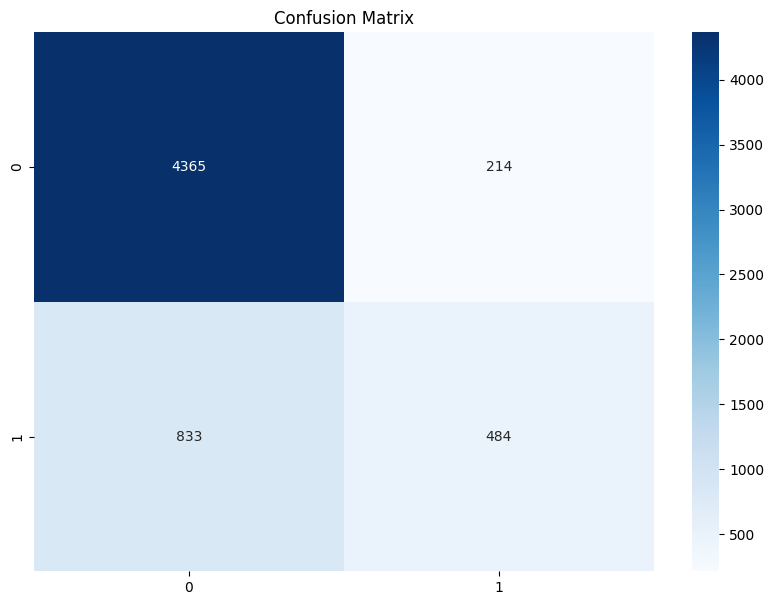

In [33]:
printInfo(attentionLSTM_s, X_time_series_test_scaled)

In [34]:
# Define the model: This will be LSTM using time-series only...
gradientLSTM = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6), return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6), return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=4, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
gradientLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
gradientLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
gradientLSTM.fit(X_time_series_train_scaled, y_train, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7849 - loss: 0.5609 - val_accuracy: 0.8002 - val_loss: 0.4736
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8091 - loss: 0.4599 - val_accuracy: 0.8009 - val_loss: 0.4689
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8098 - loss: 0.4585 - val_accuracy: 0.8000 - val_loss: 0.4672
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4533 - val_accuracy: 0.7972 - val_loss: 0.4674
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4519 - val_accuracy: 0.7882 - val_loss: 0.4687
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8118 - loss: 0.4528 - val_accuracy: 0.7922 - val_loss: 0.4698
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4490 - val_accuracy: 0.7875 - val_loss: 0.4740
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.4488 - val_accuracy: 0.7836 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8222523744911805
Precision: 0.6496106785317018
Recall: 0.4434320425208808
Specificity: 0.7514613328620086


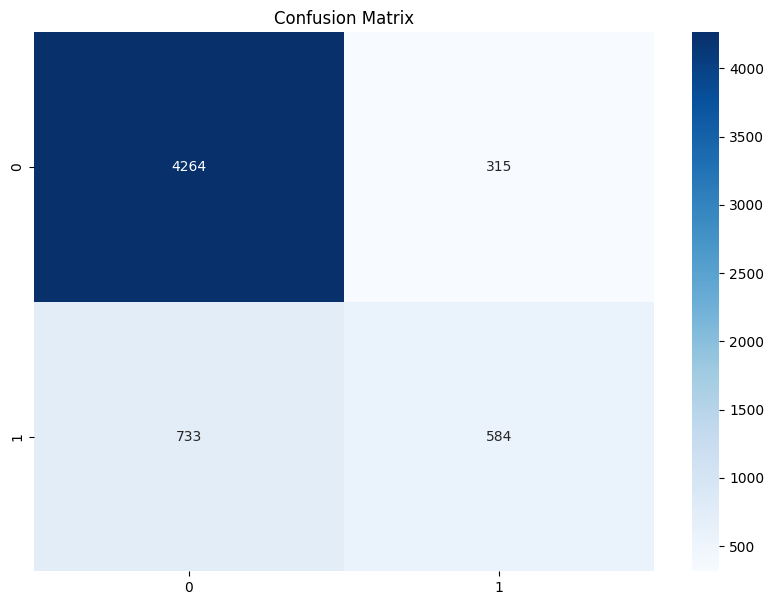

In [35]:
printInfo(gradientLSTM, X_time_series_test_scaled)

In [36]:
from keras.layers import Bidirectional

# Define the model: This will be LSTM using time-series only...
biLSTM = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
biLSTM.add(Bidirectional(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences= True)))

# Add attention layer
biLSTM.add(SeqWeightedAttention())

# Add Dropout layer
biLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
biLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
biLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
biLSTM.fit(X_time_series_train_scaled, y_train, validation_data=([X_time_series_val_scaled], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7466 - loss: 0.5673 - val_accuracy: 0.7776 - val_loss: 0.5077
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8150 - loss: 0.4477 - val_accuracy: 0.7953 - val_loss: 0.4961
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8168 - loss: 0.4409 - val_accuracy: 0.7795 - val_loss: 0.5070
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8193 - loss: 0.4399 - val_accuracy: 0.7800 - val_loss: 0.5185
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8169 - loss: 0.4404 - val_accuracy: 0.7788 - val_loss: 0.5202
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8191 - loss: 0.4373 - val_accuracy: 0.7765 - val_loss: 0.5037
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.4392 - val_accuracy: 0.7807 - val_loss: 0.5075
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8222 - loss: 0.4365 - val_accuracy: 0.7754 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8234396200814111
Precision: 0.6738035264483627
Recall: 0.4062262718299165
Specificity: 0.7602651501312766


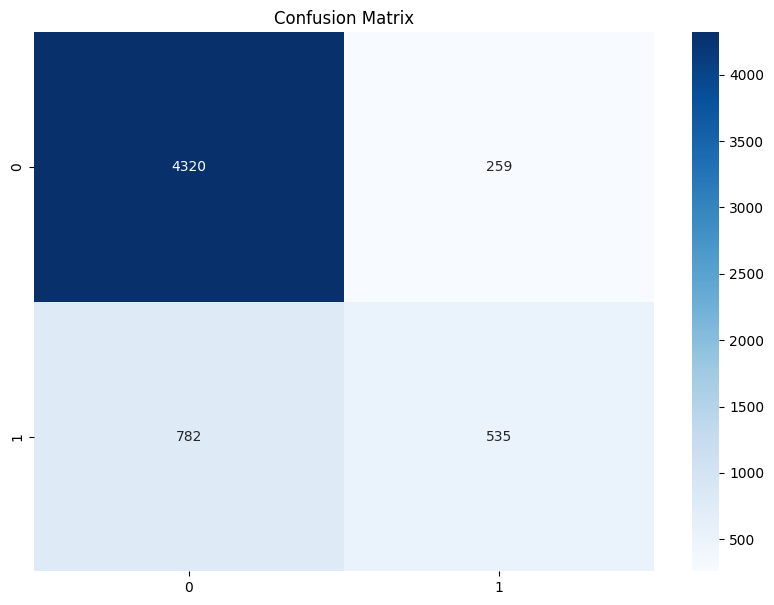

In [37]:
printInfo(biLSTM, X_time_series_test_scaled)

# Dealing with Imbalance.

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Fit and resample the data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1), y_train)

<Axes: >

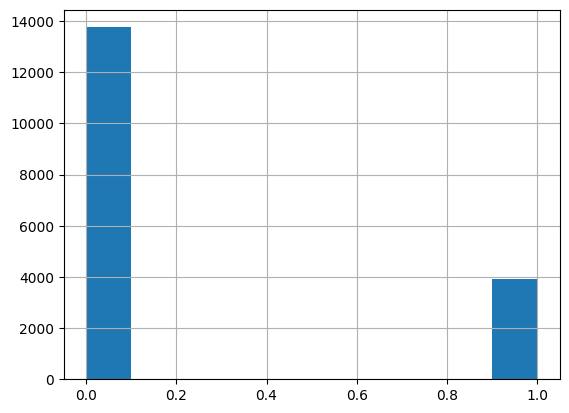

In [40]:
y_train.hist()

<Axes: >

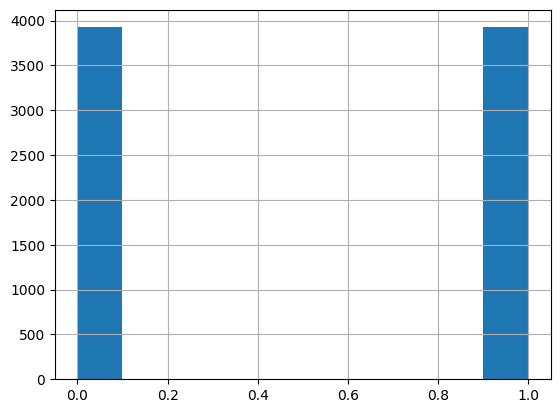

In [41]:
y_train_resampled.hist()

In [42]:
# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
# Convert the DataFrame to a NumPy array
X_train_resampled_array = X_train_resampled.values

# Now reshape it
X_time_series_train_scaled = X_train_resampled_array.reshape(-1,3,6)

In [43]:
# Define the model: This will be LSTM using time-series only...
gradientLSTM = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6), return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=9, dropout=0.2, input_shape=(3, 6), return_sequences=True))

# Adjust the units and dropout according to your data
gradientLSTM.add(LSTM(units=4, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
gradientLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
gradientLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
gradientLSTM.fit(X_time_series_train_scaled, y_train_resampled, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)


Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5513 - loss: 0.6805 - val_accuracy: 0.3485 - val_loss: 0.7948
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6507 - loss: 0.6233 - val_accuracy: 0.7183 - val_loss: 0.6593
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6623 - loss: 0.6184 - val_accuracy: 0.7407 - val_loss: 0.6410
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6748 - loss: 0.6114 - val_accuracy: 0.7449 - val_loss: 0.6330
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6722 - loss: 0.6113 - val_accuracy: 0.7439 - val_loss: 0.6293
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6760 - loss: 0.6076 - val_accuracy: 0.7408 - val_loss: 0.6339
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6786 - loss: 0.6032 - val_accuracy: 0.7217 - val_loss: 0.6450
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6860 - loss: 0.6006 - val_accuracy: 0.7081 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8024084124830394
Precision: 0.5628099173553719
Recall: 0.5170842824601367
Specificity: 0.7135432429286462


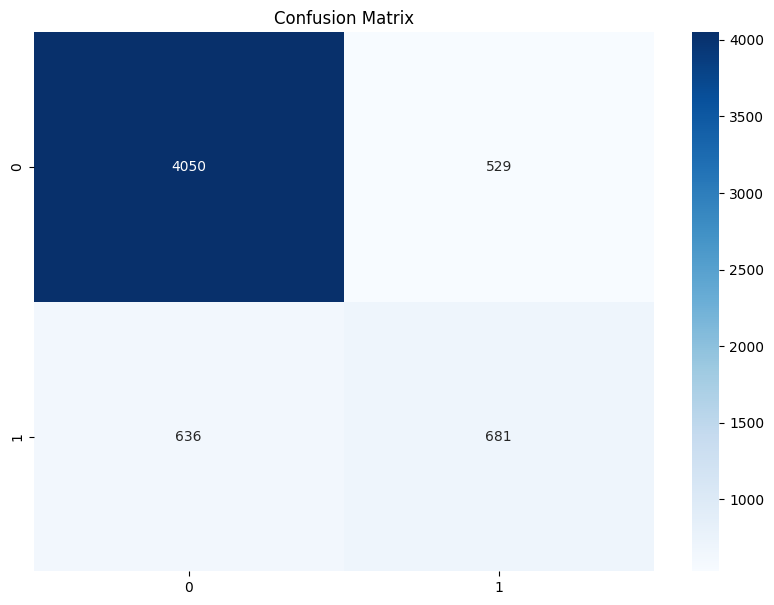

In [44]:
printInfo(gradientLSTM, X_time_series_test_scaled)

In [45]:
from keras.layers import Bidirectional

# Define the model: This will be LSTM using time-series only...
biLSTM = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
biLSTM.add(Bidirectional(LSTM(units=18, dropout=0.2, input_shape=(3, 6),return_sequences= True)))

# Add attention layer
biLSTM.add(SeqWeightedAttention())

# Add Dropout layer
biLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
biLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
biLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
biLSTM.fit(X_time_series_train_scaled, y_train_resampled, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5534 - loss: 0.6777 - val_accuracy: 0.7478 - val_loss: 0.5751
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.6099 - val_accuracy: 0.7617 - val_loss: 0.5246
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 0.5945 - val_accuracy: 0.7553 - val_loss: 0.5436
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.5923 - val_accuracy: 0.7486 - val_loss: 0.5584
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 0.5907 - val_accuracy: 0.7429 - val_loss: 0.5522
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.5910 - val_accuracy: 0.7390 - val_loss: 0.5558
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - loss: 0.5901 - val_accuracy: 0.7308 - val_loss: 0.5711
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.5873 - val_accuracy: 0.7344 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.7774762550881954
Precision: 0.5016633399866933
Recall: 0.5725132877752468
Specificity: 0.6867524530573121


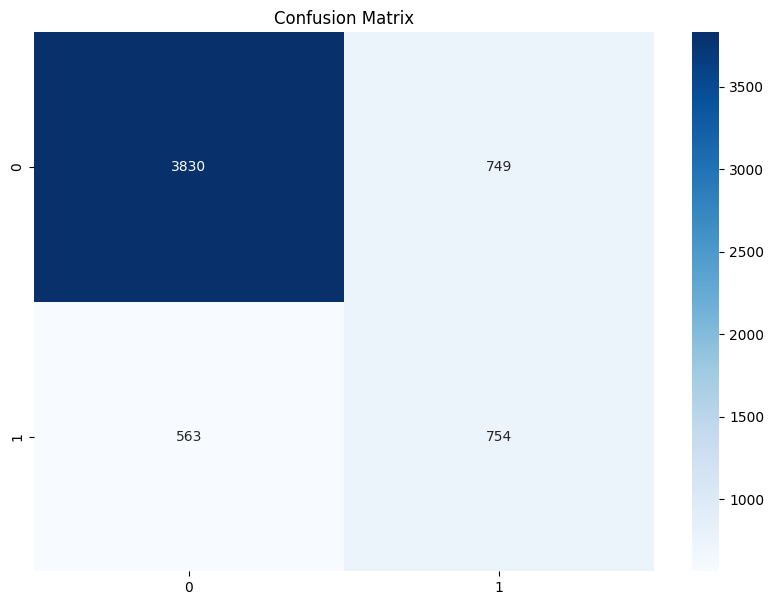

In [46]:
printInfo(biLSTM, X_time_series_test_scaled)

In [47]:
#REPEAT OUR STRUCUTRE OF BEST MODEL SO FAR ON THIS NEW DATASET
from keras_self_attention import SeqWeightedAttention
# Define the model
attentionLSTM_s = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM_s.add(LSTM(units=18, dropout=0.2, return_sequences=True, input_shape=(3,6)))

# Add attention layer
attentionLSTM_s.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM_s.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM_s.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM_s.fit(X_time_series_train_scaled, y_train_resampled, validation_data=(X_time_series_val_scaled, y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5515 - loss: 0.6785 - val_accuracy: 0.2561 - val_loss: 0.7849
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.6308 - val_accuracy: 0.6162 - val_loss: 0.6724
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 0.6118 - val_accuracy: 0.6111 - val_loss: 0.6560
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 0.6058 - val_accuracy: 0.5975 - val_loss: 0.6543
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 0.6025 - val_accuracy: 0.5909 - val_loss: 0.6542
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.5986 - val_accuracy: 0.5884 - val_loss: 0.6569
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - loss: 0.5986 - val_accuracy: 0.5880 - val_loss: 0.6570
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.5972 - val_accuracy: 0.5875 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7747625508819539
Precision: 0.4963648380700595
Recall: 0.5702353834472286
Specificity: 0.6836147713051643


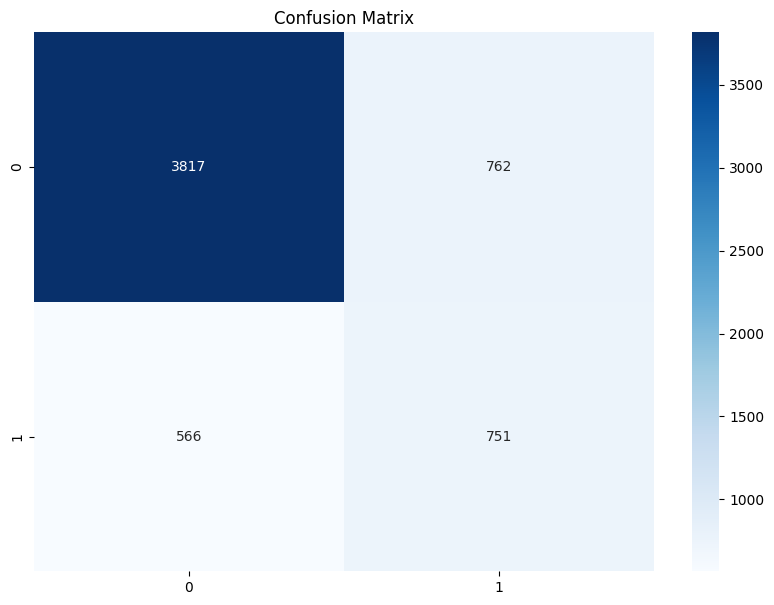

In [48]:
printInfo(attentionLSTM_s, X_time_series_test_scaled)